In [10]:
import os
import gym 
from stable_baselines3 import DQN
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.evaluation import evaluate_policy

In [11]:
from sys import path as syspath
from os import path as ospath
syspath.append(ospath.join(ospath.expanduser("~"), '/data/hashemi/Freetime/Freetime-DQN/Deep-Freetime/SB3_f'))

In [12]:
# import os
# import gym 
# import matplotlib.pyplot as plt
# import numpy as np 
# from SB3_f.sb3f import DQN
# from SB3_f.sb3f.common.vec_env import DummyVecEnv
# from SB3_f.sb3f.common.evaluation import evaluate_policy
# from SB3_f.sb3f.common.callbacks import EvalCallback, StopTrainingOnRewardThreshold

In [13]:
#environment_name = "Pong-v0"

#rewards = [[1,1,6],[1,3,4]]
rewards = [[1,0,5]]
#rewards = [[1,1,6],[1,3,4]]


In [14]:
''''
#env = gym.make(environment_name)
from GridEnv import WindyGridworld
env = WindyGridworld(
        height=20,
        width=11,
        rewards=rewards,
        wind=True,
        allowed_actions=['L', 'R', 'C'],
        reward_terminates_episode=False
    )'''

rewards = [[2,0,10],[1,0,0]]
from GridEnv import WindyGridworld
env = WindyGridworld(
        height=20,
        width=11,
        rewards=rewards,
        wind=True,
        allowed_actions=['L', 'R', 'C'],
        reward_terminates_episode=False
    )


In [15]:

model_name = 'Env3_Baseline'
load_path = os.path.join('Training', 'Saved Models',model_name)
model = DQN.load(load_path, env = env)

FileNotFoundError: [Errno 2] No such file or directory: 'Training/Saved Models/Env3_Baseline.zip'

In [ ]:
evaluate_policy(model, env, n_eval_episodes=10, render=True)
env.close()

In [ ]:
env.close()

In [ ]:
from GridEnv import *

In [ ]:
# Genereate Image for each state, maybe dict{state: img}

env_w = env.width
env_l = env.height

w = 0
# Loop width of env
state_img_dict = dict()
while w < env_w:
    l = 0
    # Loop height of env
    while l< env_l:

        env.set_pos(l,w)
        img = visualize(env)
        state_img_dict[(l,w)] = img
        
        l+=1
        
    w += 1

print(state_img_dict.keys())
# loop the dict and add the value for each image{}

# Render the state, value 

cuda:0
(84, 84, 3)
(1, 3, 84, 84)


array([[0.09349807, 0.09305158, 0.1059183 ]], dtype=float32)

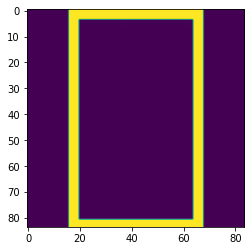

In [31]:
model.predict(state_img_dict[(0, 4)],deterministic=True)

import matplotlib.pyplot as plt
import torch as th 
from stable_baselines3.common.utils import obs_as_tensor

device = th.device('cuda:0')

print(device)


obs = state_img_dict[(0, 4)]
print(obs.shape)

observation = np.transpose(obs,(2,0,1))
observation = observation[np.newaxis,...]
print(observation.shape)
plt.imshow(observation[0,0,:,:])
#plt.imshow(obs[:,:,0])

observation = obs_as_tensor(observation, device)
with th.no_grad():
    q_values = model.q_net(observation)

q_values.cpu().detach().numpy()



In [32]:
# loop the dict and add the value for each image{}
state_img_dict[(0, 0)]

img = np.ones((20,11))

for key in state_img_dict.keys():
    state = key
    obs = state_img_dict[key]
                
    observation = np.transpose(obs,(2,0,1))
    observation = observation[np.newaxis,...]
    observation = obs_as_tensor(observation, device)
    with th.no_grad():
        q_values = model.q_net(observation)
        
    max_val = np.max(q_values.cpu().detach().numpy())

    
    img[state[0],state[1]] = max_val


In [33]:
#img

In [34]:
import matplotlib.pyplot as plt


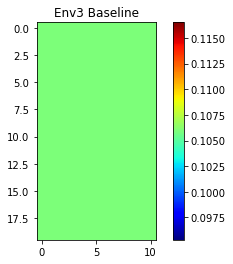

In [38]:
plt.imshow(img, cmap='jet')
plt.title("Env3 Baseline")
plt.colorbar()
plt.show()

In [36]:

plt.savefig("Env2-Qval.png")

<Figure size 432x288 with 0 Axes>

In [37]:
import numpy as np

def Network_Qtable(model,env):
    
    # Genereate Image for each state, maybe dict{state: img}
    env_w = env.width
    env_l = env.height

    w = 0
    # Loop width of env
    state_img_dict = dict()
    while w < env_w:
        l = 0
        # Loop height of env
        while l< env_l:
            env.reset()
            env.set_pos(l,w)
            img = visualize(env)
            state_img_dict[(l,w)] = img

            l+=1

        w += 1
    
    img = np.ones((20,11))

    for key in state_img_dict.keys():
        state = key
        obs = state_img_dict[key]

        observation = np.transpose(obs,(2,0,1))
        observation = observation[np.newaxis,...]
        observation = obs_as_tensor(observation, device)
        with th.no_grad():
            q_values = model.q_net(observation)

        max_val = np.max(q_values.cpu().detach().numpy())


        img[state[0],state[1]] = max_val
    
    return img


In [10]:
import torch

x = torch.randn(6)
print(x)
y = torch.randn(6)
print(y)
f_a = torch.where((x > 0) & (y>0))
print(f_a)
len(f_a)

tensor([ 1.8282,  1.4889, -0.9444, -1.4515,  0.2511, -0.3637])
tensor([ 0.8000, -0.4965, -0.8875, -0.1997,  0.1852,  2.7636])
(tensor([0, 4]),)


1

In [4]:
x = torch.randn(6)
print(x)
y = torch.randn(6)
print(y)

f_r = torch.ge(x,y).int()
print(f_r)

tensor([ 0.6249, -1.5643, -0.1308, -0.4369, -0.7843,  2.7282])
tensor([1.0327, 0.3726, 0.9488, 0.2647, 2.5963, 0.8398])
tensor([0, 0, 0, 0, 0, 1], dtype=torch.int32)


In [11]:
from Net_Qtable import Network_Qtable



In [12]:
z = torch.randn(6)
print(z)

tensor([ 0.5379, -1.0995, -0.2738,  0.4419, -0.3848, -0.1247])


In [13]:
z[f_a] = 1

In [14]:
z

tensor([ 1.0000, -1.0995, -0.2738,  0.4419,  1.0000, -0.1247])